In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('./weather.csv')
(df.head())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


# 내일비가 올 것인가? 아닌가?에 대한 정확도를 구해보자.
캐글사이트에서 다운 : https://www.kaggle.com/datasets/zaraavagyan/weathercsv 

###### MinTemp:최소 온도
###### MaxTemp:최대 온도
###### Rainfall:강우량
###### Evaporation:증발
###### Sunshine:햇빛
###### WindGustDir:강풍방향
###### WindGustSpeed:강풍속도
###### WindDir9am:강풍방향오전9시
###### WindDir3pm:강풍방향오후3시
###### WindSpeed9am:풍속오전9시
###### WindSpeed3pm:풍속오후3시
###### Humidity9am:습도오전9시
###### Humidity3pm:습도오후3시
###### Pressure9am:압력오전9시
###### Pressure3pm:압력오후3시
###### Cloud9am:구름양오전9시
###### Cloud3pm:구름양오후3시
###### Temp9am:온도오전9시
###### Temp3pm:온도오후3시
###### RainToday:오늘비가왔는가?
###### RISK_MM:
###### RainTomorrow:내일비가올것인가?
# -----------------------------------------
#### RISK_MM 컬럼이 정확도에 큰 영향을 미쳐서(정확도가 1이 나옴)지우고 코드를 실행.
#### 시각화: 1)각 컬럼간의 상관도, 
####           2) decision tree,random forest,svm 중 가장 정확도가 높은 순서대로 바 그래프 표현.

In [4]:
#필요없는 열을 지워보자.
#WindGustDir
#WindDir9am
#WindDir3pm
#를 지워보자.
def drop_features(df):
    df.drop(columns=['WindGustDir','WindDir9am','WindDir3pm','RISK_MM'],inplace=True)
    return(df)

In [5]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
#결측지 값을 평균으로 대체하자.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [9]:
def fillna(df):
    df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
    df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)  
    df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)  
    return df

In [10]:
df = fillna(df)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [12]:
#라벨인코딩:RainToday,RainTomorrow

In [13]:
#라벨링 함수화 
def label_encoding(df):
    le = LabelEncoder()#라벨인코딩하는 객체 생성
    features = ['RainToday','RainTomorrow']
    for f in features:
        le.fit(df[f])
        print('라벨링할 목록=>', le.classes_)
        df[f] =le.transform(df[f])
    return df

In [14]:
df = label_encoding(df)
df.head()

라벨링할 목록=> ['No' 'Yes']
라벨링할 목록=> ['No' 'Yes']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [15]:
#지금까지 만든함수 한번에 묶어서 불러주기.
def preprocessing(df):
    df2 = fillna(df)
    df3 = drop_features(df2)
    df4 = label_encoding(df3)
    return df4

In [16]:
df2 = pd.read_csv('./weather.csv')
(df.head())
#데이터 전처리 호출
df3 = preprocessing(df2)
df3.head()

라벨링할 목록=> ['No' 'Yes']
라벨링할 목록=> ['No' 'Yes']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [17]:
#각 컬럼간의 연관성을 보고, 상관도를 그려보자.
df2_corr = df2.corr()
df2_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,0.217224,0.126251,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.230733,0.233213
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,0.109415,-0.214649,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,-0.065860,0.049228
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.096160,0.218979,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.693024,0.133586
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,0.287709,0.068176,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,-0.032638,0.090528
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,0.095676,-0.064200,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.166477,-0.386095
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,1.000000,0.518508,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.189886,0.249445
WindSpeed9am,0.126251,-0.214649,0.218979,0.068176,-0.064200,0.518508,1.000000,0.467090,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.262626,0.088224
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072494,0.693641,0.467090,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,0.083483,0.042505
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497692,-0.349433,-0.267654,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.203495,0.185077
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.755186,-0.069432,0.145866,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.319582,0.366882


<AxesSubplot:>

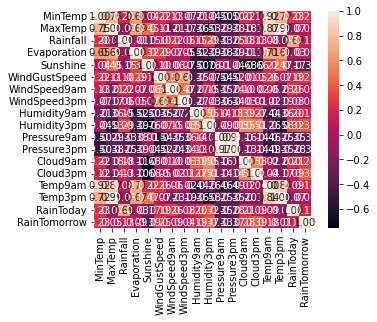

In [18]:
cols = df2.columns
sns.heatmap(df2_corr.values,
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

In [19]:
df2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [21]:
#훈련시켜보자.
data = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday']
#train_test data split
X_train, X_test, y_train, y_test = train_test_split(
    #문제
    df3[data],
    #정답
    df3['RainTomorrow'],
    #test-size비율
    test_size= 0.2,
    #시드값설정
    random_state=10
)

In [22]:
X_train.shape

(292, 17)

In [23]:
X_test.shape

(74, 17)

In [24]:
y_test.shape

(74,)

In [25]:
y_train.shape

(292,)

In [26]:
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

In [27]:
#train 데이터 3가지 방법으로 훈련데이터 훈련시켜서
#정확도 비교
for clf in clf_list:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print('정확도>> {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도>> 0.8514
정확도>> 0.8243
정확도>> 0.8108


In [28]:
kfold = KFold(n_splits=5)

In [29]:
#샘플데이터를 i번 바꿔서 다양하게 변화시키는것:k-fold
#인덱스(i)를 찍어보자
for i, (train_index, test_index) in enumerate(kfold.split(df3[data])):
    print(i,'-------------')
    print('test_index>> ',test_index)
    print('train_index>> ',train_index)    

0 -------------
test_index>>  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
train_index>>  [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 25

In [30]:
#샘플데이터를 i번 바꿔서 다양하게 변화시키는것:k-fold
#enumerate 쓰면 index가 같이 나오므로 i를 써줘야한다.
#(train_index, test_index)가 2개의 이차배열인 (kfold.split(titanic_df3[data]))의 0번째 1번째 값들이 된다.
def exec_kfold(clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df3[data])):
        X_train2,X_test2 = df3[data].values[train_index], df3[data].values[test_index]
        y_train2,y_test2 = df3['RainTomorrow'].values[train_index], df3['RainTomorrow'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))

In [31]:
exec_kfold(df_clf, 5) 
#decision tree model을 가지고 cross-validation()

0 : 정확도>> 0.76
1 : 정확도>> 0.74
2 : 정확도>> 0.85
3 : 정확도>> 0.86
4 : 정확도>> 0.86
평균 정확도>> 0.81


In [32]:
exec_kfold(df_clf,10)

0 : 정확도>> 0.78
1 : 정확도>> 0.73
2 : 정확도>> 0.68
3 : 정확도>> 0.78
4 : 정확도>> 0.89
5 : 정확도>> 0.81
6 : 정확도>> 0.83
7 : 정확도>> 0.86
8 : 정확도>> 0.75
9 : 정확도>> 0.81
평균 정확도>> 0.79


In [33]:
exec_kfold(rf_clf,10)#렌덤포레스트

0 : 정확도>> 0.78
1 : 정확도>> 0.84
2 : 정확도>> 0.76
3 : 정확도>> 0.92
4 : 정확도>> 0.92
5 : 정확도>> 0.86
6 : 정확도>> 0.97
7 : 정확도>> 0.89
8 : 정확도>> 0.94
9 : 정확도>> 0.89
평균 정확도>> 0.88


In [34]:
exec_kfold(svc_clf,10)#svc

0 : 정확도>> 0.70
1 : 정확도>> 0.76
2 : 정확도>> 0.73
3 : 정확도>> 0.84
4 : 정확도>> 0.89
5 : 정확도>> 0.86
6 : 정확도>> 0.86
7 : 정확도>> 0.83
8 : 정확도>> 0.83
9 : 정확도>> 0.89
평균 정확도>> 0.82


In [35]:
##model list로 교차검증이 한꺼번에 되게 코드를 변경해보고,
##model list중 평균값의 교차검증 결과 중 최대인 모델의 평균값은>
##평균값이 제일 높은 모델을 선정해보세요!
## 제일 정확도가 높은 모델은 랜덤포레스트이고, 정확도는 88입니다.

In [36]:
# df_clf = DecisionTreeClassifier(random_state=11)
# rf_clf = RandomForestClassifier(random_state=11)
# svc_clf = SVC()
# clf_list = [df_clf, rf_clf, svc_clf]

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustSpeed  366 non-null    float64
 6   WindSpeed9am   366 non-null    float64
 7   WindSpeed3pm   366 non-null    int64  
 8   Humidity9am    366 non-null    int64  
 9   Humidity3pm    366 non-null    int64  
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
 12  Cloud9am       366 non-null    int64  
 13  Cloud3pm       366 non-null    int64  
 14  Temp9am        366 non-null    float64
 15  Temp3pm        366 non-null    float64
 16  RainToday      366 non-null    int32  
 17  RainTomorrow   366 non-null    int32  
dtypes: float64

In [39]:
#int형이라 안될 때!
pd.get_dummies(df3.loc[:, ['WindSpeed3pm', 'Cloud3pm', 'RainToday']])

,WindSpeed3pm,Cloud3pm,RainToday
0,20,7,0
1,17,3,1
2,6,7,1
3,24,7,1
4,28,7,1
...,...,...,...
361,50,3,0
362,19,1,0
363,9,2,0
364,28,7,0


In [40]:
#category로 바꾸는 이유는 int값이면 숫자니까 원핫인코딩 안할수 있어서
#int값이긴 하지만 category라는 것을 알려주기 위함.
#카테고리형: (0~8)=>one-hot encoding의 대상이 된다.
             # 카테고리에 포함된 수치만 와야함
#age:연속형, 다른 수치가 와도 된다.
as_cate = df3[['WindSpeed3pm', 'Cloud3pm', 'RainToday']].astype('category')
as_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   WindSpeed3pm  366 non-null    category
 1   Cloud3pm      366 non-null    category
 2   RainToday     366 non-null    category
dtypes: category(3)
memory usage: 2.9 KB


In [41]:
df3.drop(columns=['WindSpeed3pm', 'Cloud3pm', 'RainToday'], inplace=True)

In [42]:
df4 = pd.concat([df3, as_cate], axis=1)
df4.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm',
       'RainTomorrow', 'WindSpeed3pm', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [44]:
as_cate.head()

,WindSpeed3pm,Cloud3pm,RainToday
0,20,7,0
1,17,3,1
2,6,7,1
3,24,7,1
4,28,7,1


In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MinTemp        366 non-null    float64 
 1   MaxTemp        366 non-null    float64 
 2   Rainfall       366 non-null    float64 
 3   Evaporation    366 non-null    float64 
 4   Sunshine       366 non-null    float64 
 5   WindGustSpeed  366 non-null    float64 
 6   WindSpeed9am   366 non-null    float64 
 7   Humidity9am    366 non-null    int64   
 8   Humidity3pm    366 non-null    int64   
 9   Pressure9am    366 non-null    float64 
 10  Pressure3pm    366 non-null    float64 
 11  Cloud9am       366 non-null    int64   
 12  Temp9am        366 non-null    float64 
 13  Temp3pm        366 non-null    float64 
 14  RainTomorrow   366 non-null    int32   
 15  WindSpeed3pm   366 non-null    category
 16  Cloud3pm       366 non-null    category
 17  RainToday      366 non-null    cate

In [46]:
# category로 변경 후 다시!
pd.get_dummies(df4)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,...,Cloud3pm_1,Cloud3pm_2,Cloud3pm_3,Cloud3pm_4,Cloud3pm_5,Cloud3pm_6,Cloud3pm_7,Cloud3pm_8,RainToday_0,RainToday_1
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,68,29,1019.7,...,0,0,0,0,0,0,1,0,1,0
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,80,36,1012.4,...,0,0,1,0,0,0,0,0,0,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,82,69,1009.5,...,0,0,0,0,0,0,1,0,0,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,62,56,1005.5,...,0,0,0,0,0,0,1,0,0,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,68,49,1018.3,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,38,15,1016.1,...,0,0,1,0,0,0,0,0,1,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,45,22,1020.0,...,1,0,0,0,0,0,0,0,1,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,63,47,1024.0,...,0,1,0,0,0,0,0,0,1,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,69,39,1021.0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
def exec_kfold2(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['RainTomorrow'].values[train_index],df['RainTomorrow'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [52]:
#decision tree와 randomforest와 svm를 시각화 하여 어떤 것을 사용하는게 합리적인지 보여줄 수 있다.
acc_total = []
model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    print(model_list[i], '----검증시작----')
    acc_result = exec_kfold2(df4, clf, 10)
    acc_total.append(acc_result)

decision tree ----검증시작----
0 : 교차검증 정확도>> 0.78
1 : 교차검증 정확도>> 0.73
2 : 교차검증 정확도>> 0.68
3 : 교차검증 정확도>> 0.78
4 : 교차검증 정확도>> 0.89
5 : 교차검증 정확도>> 0.81
6 : 교차검증 정확도>> 0.83
7 : 교차검증 정확도>> 0.86
8 : 교차검증 정확도>> 0.75
9 : 교차검증 정확도>> 0.81
평균 정확도>> 0.79
random forest ----검증시작----
0 : 교차검증 정확도>> 0.78
1 : 교차검증 정확도>> 0.84
2 : 교차검증 정확도>> 0.76
3 : 교차검증 정확도>> 0.92
4 : 교차검증 정확도>> 0.92
5 : 교차검증 정확도>> 0.86
6 : 교차검증 정확도>> 0.97
7 : 교차검증 정확도>> 0.89
8 : 교차검증 정확도>> 0.94
9 : 교차검증 정확도>> 0.89
평균 정확도>> 0.88
svm ----검증시작----
0 : 교차검증 정확도>> 0.70
1 : 교차검증 정확도>> 0.76
2 : 교차검증 정확도>> 0.73
3 : 교차검증 정확도>> 0.84
4 : 교차검증 정확도>> 0.89
5 : 교차검증 정확도>> 0.86
6 : 교차검증 정확도>> 0.86
7 : 교차검증 정확도>> 0.83
8 : 교차검증 정확도>> 0.83
9 : 교차검증 정확도>> 0.89
평균 정확도>> 0.82


In [53]:
for i in range(3):
    print(model_list[i], " 교차검증 평균: ", acc_total[i])

decision tree  교차검증 평균:  0.7925675675675675
random forest  교차검증 평균:  0.8775525525525525
svm  교차검증 평균:  0.820045045045045


In [54]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.8775525525525525
최고 교차 검증 인덱스>>  1
최고 교차 검증 모델링>>  random forest


In [56]:
 acc_total[0]

0.7925675675675675

In [63]:
max_df = pd.DataFrame({'method':['decision tree','random forest','svm'],'max_value':[ acc_total[0], acc_total[1], acc_total[2]]})
max_df

,method,max_value
0,decision tree,0.792568
1,random forest,0.877553
2,svm,0.820045


In [61]:
#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

<AxesSubplot:ylabel='method'>

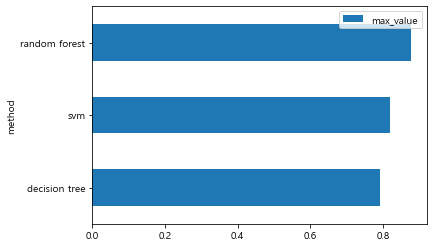

In [77]:
#어떤 방법이 가장 정확도가 높은지 바그래프로 표현.
max_df = max_df.sort_values(by=['max_value'], ascending=True) 
max_df.plot.barh(x='method', y='max_value')